In [1]:
#### Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### allow plots to appear directly in the notebook
%matplotlib inline

In [2]:
#### loading dataSet as pandas dataFrame
data=pd.read_csv('./Data/mtcars_original.csv')

#### Let’s take a look at the top five rows using the DataFrame’s head() method
data.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Each row represents one district. There are 12 attributes : 'Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs','am', 'gear', 'carb'.

In [3]:
#### Renaming the column name 'Unnamed: 0' to 'car_name'
data.rename(columns={'Unnamed: 0':'car_name'}, inplace=True)

#### Printing column names
data.columns

Index(['car_name', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')

In [4]:
'''
The info() method is useful to get a quick description of the data, in particular the total number of rows, 
and each attribute’s type and number of non-null values
'''
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  32 non-null     object 
 1   mpg       32 non-null     float64
 2   cyl       32 non-null     int64  
 3   disp      32 non-null     float64
 4   hp        32 non-null     int64  
 5   drat      32 non-null     float64
 6   wt        32 non-null     float64
 7   qsec      32 non-null     float64
 8   vs        32 non-null     int64  
 9   am        32 non-null     int64  
 10  gear      32 non-null     int64  
 11  carb      32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [5]:
#### checking the no.of unique values in car_name column
data['car_name'].nunique()

32

In [6]:
#### From the above it is observed that each row contains distinct car name so dropping the column
data.drop('car_name',axis=1,inplace=True)

In [7]:
#### The describe() method shows a summary of the numerical attributes
#pd.options.display.float_format = '{:.2f}'.format
data.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022AB357F708>,
      dtype=object)

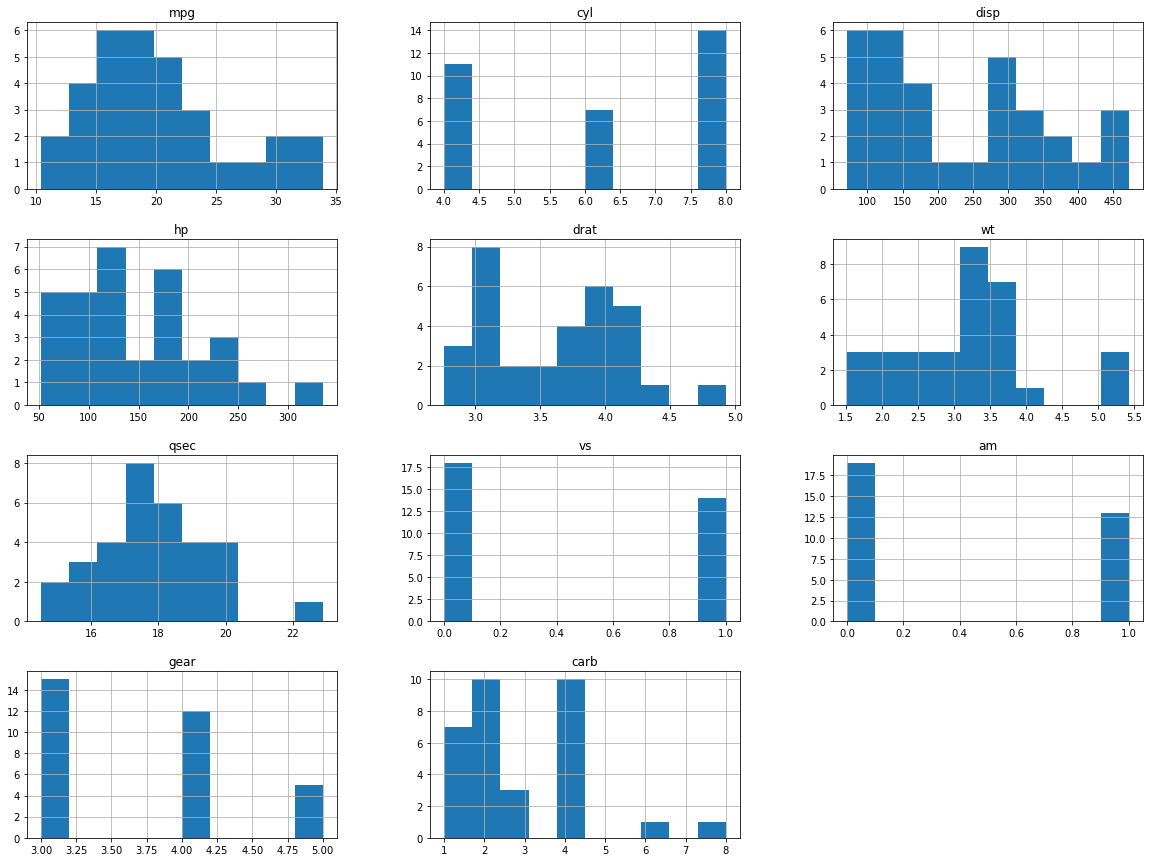

In [8]:
#### A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis).
data.hist(figsize=(20,15))

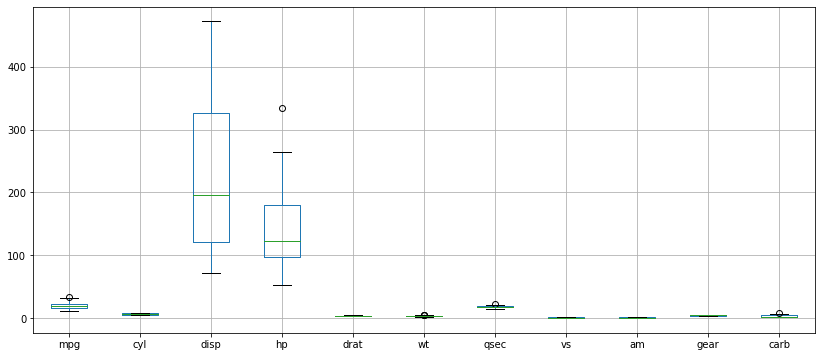

In [9]:
#### Plot box to check the outliers
plt.figure(figsize=(14,6))
data.boxplot()

In [10]:
#### Standardizing the data
data['disp']=data['disp']/100
data['hp']=data['hp']/100
data['qsec']=data['qsec']/10

data.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,1.60,1.10,3.90,2.620,1.646,0,1,4,4
1,21.0,6,1.60,1.10,3.90,2.875,1.702,0,1,4,4
2,22.8,4,1.08,0.93,3.85,2.320,1.861,1,1,4,1
3,21.4,6,2.58,1.10,3.08,3.215,1.944,1,0,3,1
4,18.7,8,3.60,1.75,3.15,3.440,1.702,0,0,3,2


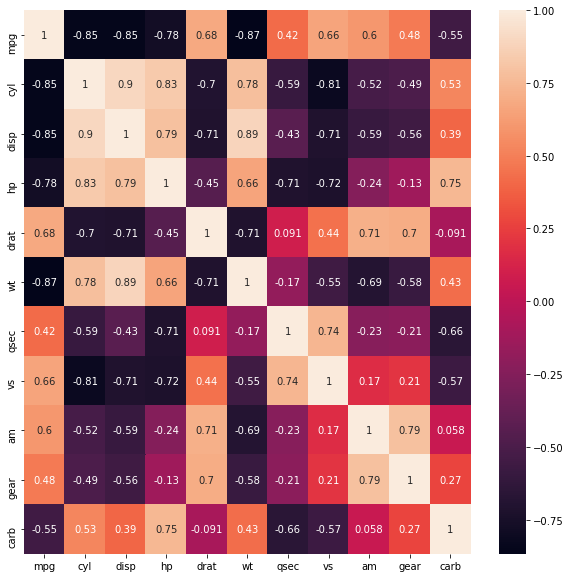

In [11]:
#### plot heat map shows the correlation between two variables
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [12]:
x = data.drop('mpg',axis=1)
y = data['mpg']

## Linear Regression using StatsModel

In [13]:
import statsmodels.formula.api as smf
#### instantiate and fit
reg=smf.ols("mpg~cyl+disp+hp+drat+wt+qsec+vs+am+gear+carb",data=data)
results=reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Thu, 20 Aug 2020   Prob (F-statistic):           3.79e-07
Time:                        21:41:43   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3034     18.718      0.657      0.5

## Linear Regression using Sklearn

In [14]:
from sklearn.linear_model import LinearRegression
#### instantiate and fit
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression()

In [15]:
import time
from scipy.stats import t
from tabulate import tabulate

def summary(model_name, x, y):
    
    #### coefficients of straight line
    coef = model_name.coef_
    #### Degrees oF Freedom
    DF = x.shape[0]-x.shape[1]-1
    #### R-Squared
    R_squared = round(model_name.score(x, y), 3)
    #### Adjusted.R-Squared
    adjusted_r_squared = round(1-(((1-R_squared)*(len(y)-1))/(DF)), 3)
    #### t critical value
    t_critical = t.ppf(0.975, DF)
    
    list_smy = []
    Sdf = pd.DataFrame({'A':y, 'P':model_name.predict(x)})
    Sdf['(A-P)**2'] = (Sdf['A']-Sdf['P'])**2
    summary_model = LinearRegression()
    
    for i in range(x.shape[1]):
        dict_smy = {}
        j = x.columns[i]
        Sdf[j] = x[j]
        Sdf['(j-jbar)**2'] = (Sdf[j]-Sdf[j].mean())**2
        #### Calculating R-squared with other independent column 
        x1 = x.drop(j,axis=1)
        y1 = x[j]
        summary_model.fit(x1, y1)
        R_squared_i = summary_model.score(x1, y1)
        #### Assigning coef to dict_smy
        dict_smy['Coef'] = round(coef[i], 4)
        #### Calculating std error 
        dict_smy['Std err'] = round(((Sdf['(A-P)**2'].sum()/DF)**0.5)/(((1-R_squared_i)*Sdf['(j-jbar)**2'].sum())**0.5), 4)
        Sdf.drop([j, '(j-jbar)**2'], axis=1, inplace=True)
        #### Calculating t statistic value 
        dict_smy['t'] = round(dict_smy['Coef']/dict_smy['Std err'], 3)
        #### Calculating p value
        dict_smy['p>|t|'] = round(t.sf(abs(dict_smy['t']), DF)*2, 3)
        #### Calculating Confidence interval
        dict_smy['[0.025'] = round(dict_smy['Coef']-(t_critical*dict_smy['Std err']), 3)
        dict_smy['0.095]'] = round(dict_smy['Coef']+(t_critical*dict_smy['Std err']), 3)
        list_smy.append(dict_smy)
        
    df_smy =pd.DataFrame(list_smy, index=x.columns)
    print(' '*25,"Regression Result")
    print("="*71)
    print("  Date             :", time.strftime("%a, %d %b %Y", time.localtime()))
    print("  Time             :", time.strftime("%H:%M:%S", time.localtime()))
    print("  No. Observations :", x.shape[0])
    print("  Df Residuals     :", DF)
    print("  Df Model         :", x.shape[1])
    print("  R-squared        :", R_squared)
    print("  Adj. R-squared   :", adjusted_r_squared)
    print("  Intercept        :", round(model_name.intercept_, 4))
    print("="*71)
    print(tabulate(df_smy, headers = 'keys', tablefmt = 'github'))
    print("="*71)

In [16]:
summary(lin_reg, x, y)

                          Regression Result
  Date             : Thu, 20 Aug 2020
  Time             : 21:41:44
  No. Observations : 32
  Df Residuals     : 21
  Df Model         : 10
  R-squared        : 0.869
  Adj. R-squared   : 0.807
  Intercept        : 12.3034
|      |    Coef |   Std err |      t |   p>|t| |   [0.025 |   0.095] |
|------|---------|-----------|--------|---------|----------|----------|
| cyl  | -0.1114 |    1.045  | -0.107 |   0.916 |   -2.285 |    2.062 |
| disp |  1.3335 |    1.7858 |  0.747 |   0.463 |   -2.38  |    5.047 |
| hp   | -2.1482 |    2.1769 | -0.987 |   0.335 |   -6.675 |    2.379 |
| drat |  0.7871 |    1.6354 |  0.481 |   0.635 |   -2.614 |    4.188 |
| wt   | -3.7153 |    1.8944 | -1.961 |   0.063 |   -7.655 |    0.224 |
| qsec |  8.2104 |    7.3084 |  1.123 |   0.274 |   -6.988 |   23.409 |
| vs   |  0.3178 |    2.1045 |  0.151 |   0.881 |   -4.059 |    4.694 |
| am   |  2.5202 |    2.0567 |  1.225 |   0.234 |   -1.757 |    6.797 |
| gear |  0.6

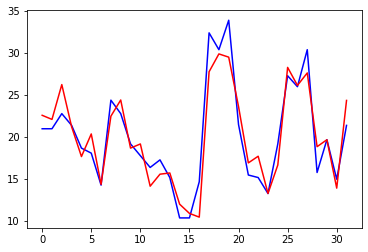

In [17]:
#### predicting 'mpg' using lin_reg
predictions = lin_reg.predict(x)

#### Actual vs Predicted plot
plt.plot(y,"b")
plt.plot(predictions,"r")

In [18]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

MAE: 1.7227401628911443
MSE: 4.609200938020334
RMSE: 2.146904967160944
